<a href="https://colab.research.google.com/github/ananyag27/Machine-Learning-Lab/blob/main/LAB05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.read_csv('/content/cleaned_survey.csv')
X = data[['Age']]
y = data['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(y_train_pred)
print(y_test_pred)

[28.78499223 29.42941431 29.29271871 ... 29.37083048 29.05838341
 29.03885547]
[29.21460695 28.94121576 29.52705402 ... 29.03885547 28.84357605
 28.98027164]


In [2]:
#A2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Train MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print(f"Test MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")

Train MSE: 33.15334627566021, RMSE: 5.757894257075256, MAPE: 0.16380233323214974, R2: 0.0012980800852132601
Test MSE: 34.48920977445025, RMSE: 5.872751465407867, MAPE: 0.1654510289997598, R2: 0.0031900471117141116


In [6]:
#A3
X = data[['Age', 'Sleep Duration (Hours)']]
y = data['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(y_train_pred)
print(y_test_pred)

[28.86827313 29.42564727 29.29475222 ... 29.33969813 29.17484013
 29.08151268]
[29.19010378 28.92831368 29.48929247 ... 29.02181015 28.86466848
 29.01048917]


In [8]:
#A4
from sklearn.cluster import KMeans
X = data[['Age', 'BMI', 'Sleep Duration (Hours)']]
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print(labels)
print(centers)

[0 1 0 ... 0 0 0]
[[71.35924446 28.82368325  7.52415547]
 [53.65984405 29.47098765  7.04434698]]


In [14]:
#A5
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
silhouette = silhouette_score(X, kmeans.labels_)
ch_score = calinski_harabasz_score(X, kmeans.labels_)
db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette}, CH Score: {ch_score}, DB Index: {db_index}")

ValueError: Found input variables with inconsistent numbers of samples: [5831, 4664]

In [16]:
#A6
distortions = []
silhouette_scores = []
ch_scores = []
db_indices = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
  distortions.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X, kmeans.labels_))
  ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
  db_indices.append(davies_bouldin_score(X, kmeans.labels_))
print(distortions)
print(silhouette_scores)
print(ch_scores)
print(db_indices)

[418789.9849218527, 301627.8038563483, 230154.31754594835, 195988.86474755872, 164709.38572674818, 145117.09877579942, 129322.06516159016, 116119.30908643028]
[0.4232520137268638, 0.34797710518168, 0.3646689885760263, 0.3191837460762913, 0.3267701120556052, 0.3222979842996267, 0.3159127266453009, 0.3200407210246308]
[6349.610075690656, 5539.215894618807, 5442.100943935761, 5045.9811403592685, 5023.868843376948, 4882.077735794012, 4796.55336830916, 4756.019064441872]
[0.8733543892146519, 1.0174431889547024, 0.8928998118195397, 0.95360606165221, 0.9006512065450715, 0.912527154206274, 0.9382586654435079, 0.8838010880358345]


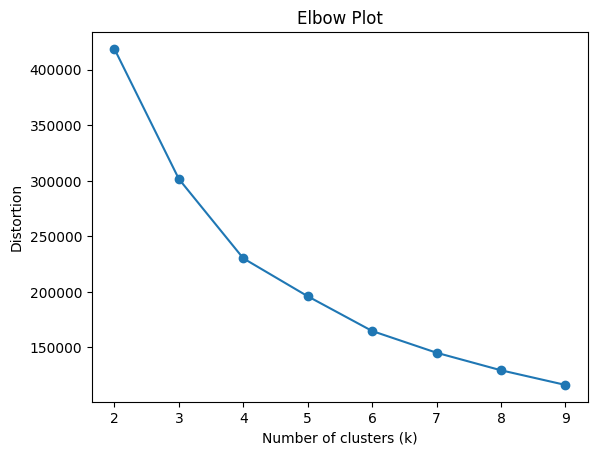

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Plot')
plt.show()